Code for making twitter graphics

In [92]:
import fastf1
import fastf1.plotting as plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from plotly.io import show
from plotly.subplots import make_subplots
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1')

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("F1 Tire Degradation Analysis Environment Ready! 🏎️")

F1 Tire Degradation Analysis Environment Ready! 🏎️


In [74]:
race = fastf1.get_session(2025, "Qatar", "Race")
race.load()
ver_laps = race.laps.pick_drivers("VER").pick_quicklaps().reset_index()
pia_laps = race.laps.pick_drivers("PIA").pick_quicklaps().reset_index()
sai_laps = race.laps.pick_drivers("SAI").pick_quicklaps().reset_index()
ant_laps = race.laps.pick_drivers("ANT").pick_quicklaps().reset_index()
nor_laps = race.laps.pick_drivers("NOR").pick_quicklaps().reset_index()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data

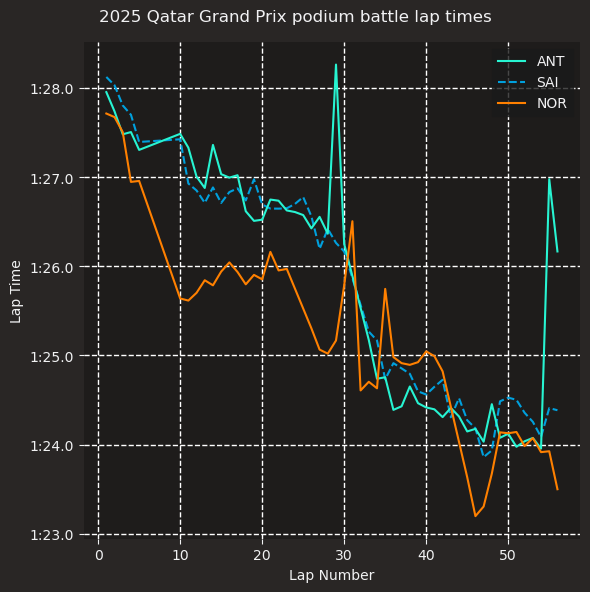

In [49]:
my_styles = [
    # style for each first driver
    {'color': 'auto', 'linewidth': 0},
    # style for each second driver
    {'color': 'auto', 'linewidth': 0}
]
fig, ax = plt.subplots(figsize=(6, 6))

for driver in ('SAI', 'ANT', 'NOR'):
    laps = race.laps.pick_drivers(driver).reset_index()
    laps = laps[laps['IsAccurate'] == True]
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

plt.suptitle("2025 Qatar Grand Prix podium battle lap times")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both', linestyle='--', linewidth=1)
sns.despine(left=True, bottom=True)
plotting.add_sorted_driver_legend(ax, race)
plt.tight_layout()
plt.show()

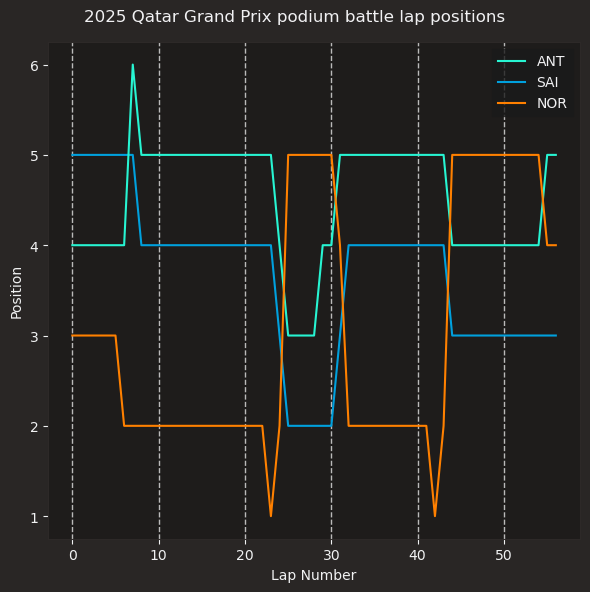

In [46]:
from matplotlib.ticker import MultipleLocator


my_styles = [
    # style for each first driver
    {'color': 'auto', 'linewidth': 0},
    # style for each second driver
    {'color': 'auto', 'linewidth': 0}
]
fig, ax = plt.subplots(figsize=(6, 6))

for driver in ('SAI', 'ANT', 'NOR'):
    laps = race.laps.pick_drivers(driver).reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color'],
                                      session=race)
    ax.plot(laps['Position'], **style, label=driver)
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel("Lap Number")
ax.set_ylabel("Position")

plt.suptitle("2025 Qatar Grand Prix podium battle lap positions")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='x', linestyle='--', linewidth=1, alpha=0.7)
#sns.despine(left=True, bottom=True)
plotting.add_sorted_driver_legend(ax, race)
plt.tight_layout()
plt.show()

# 2025 season battle for 2nd in constructors

In [50]:
season = 2025
schedule = fastf1.get_event_schedule(season, include_testing=False)

In [63]:
standings = []
# Shorten the event names by trimming Grand Prix from the name.
# This will be used to label our graph.
short_event_names = []

for _, event in schedule.iterrows():
    event_name, round_number = event["EventName"], event["RoundNumber"]
    short_event_names.append(event_name.replace("Grand Prix", "").strip())

    # Only need to load the results data
    race = fastf1.get_session(season, event_name, "R")
    race.load(laps=False, telemetry=False, weather=False, messages=False)

    # Add sprint race points if applicable
    sprint = None
    # F1 has used different names for the sprint race event format
    # From 2024 onwards, it has been "sprint_qualifying"
    # In 2023, you should match on "sprint_shootout"
    # In 2022 and 2021, you should match on "sprint"
    if event["EventFormat"] == "sprint_qualifying":
        sprint = fastf1.get_session(season, event_name, "S")
        sprint.load(laps=False, telemetry=False, weather=False, messages=False)

    for _, driver_row in race.results.iterrows():
        abbreviation, race_points, race_position, team_name = (
            driver_row["Abbreviation"],
            driver_row["Points"],
            driver_row["Position"],
            driver_row["TeamName"],
        )

        sprint_points = 0
        if sprint is not None:
            driver_row = sprint.results[
                sprint.results["Abbreviation"] == abbreviation
            ]
            if not driver_row.empty:
                # We need the values[0] accessor because driver_row is actually
                # returned as a dataframe with a single row
                sprint_points = driver_row["Points"].values[0]

        standings.append(
            {
                "EventName": event_name,
                "RoundNumber": round_number,
                "Driver": abbreviation,
                "Points": race_points + sprint_points,
                "Position": race_position,
                "Team Name": team_name
            }
        )

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', '22', '31', '87', '30', '5', '14', '55', '7', '6']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '31', '12', '23', '87', '18', '55', '6', '30', '7', '5', '27', '22', '14', '16', '44', '10']
core           INFO 	Loading dat

In [66]:
df = pd.DataFrame(standings)
df.head()

,EventName,RoundNumber,Driver,Points,Position,Team Name
0,Australian Grand Prix,1,NOR,25.0,1.0,McLaren
1,Australian Grand Prix,1,VER,18.0,2.0,Red Bull Racing
2,Australian Grand Prix,1,RUS,15.0,3.0,Mercedes
3,Australian Grand Prix,1,ANT,12.0,4.0,Mercedes
4,Australian Grand Prix,1,ALB,10.0,5.0,Williams


In [ ]:
race_points = df.groupby(['RoundNumber', 'EventName', 'Team Name'])['Points'].sum().reset_index()
race_points = race_points.sort_values(by=['Team Name', 'RoundNumber'])
race_points

,RoundNumber,EventName,Team Name,Points
0,1,Australian Grand Prix,Alpine,0.0
10,2,Chinese Grand Prix,Alpine,0.0
20,3,Japanese Grand Prix,Alpine,0.0
30,4,Bahrain Grand Prix,Alpine,6.0
40,5,Saudi Arabian Grand Prix,Alpine,0.0
...,...,...,...,...
189,19,United States Grand Prix,Williams,9.0
199,20,Mexico City Grand Prix,Williams,0.0
209,21,São Paulo Grand Prix,Williams,0.0
219,22,Las Vegas Grand Prix,Williams,10.0


In [70]:
race_points['Cumulative Points'] = race_points.groupby('Team Name')['Points'].cumsum()
race_points

,RoundNumber,EventName,Team Name,Points,Cumulative Points
0,1,Australian Grand Prix,Alpine,0.0,0.0
10,2,Chinese Grand Prix,Alpine,0.0,0.0
20,3,Japanese Grand Prix,Alpine,0.0,0.0
30,4,Bahrain Grand Prix,Alpine,6.0,6.0
40,5,Saudi Arabian Grand Prix,Alpine,0.0,6.0
...,...,...,...,...,...
189,19,United States Grand Prix,Williams,9.0,111.0
199,20,Mexico City Grand Prix,Williams,0.0,111.0
209,21,São Paulo Grand Prix,Williams,0.0,111.0
219,22,Las Vegas Grand Prix,Williams,10.0,121.0


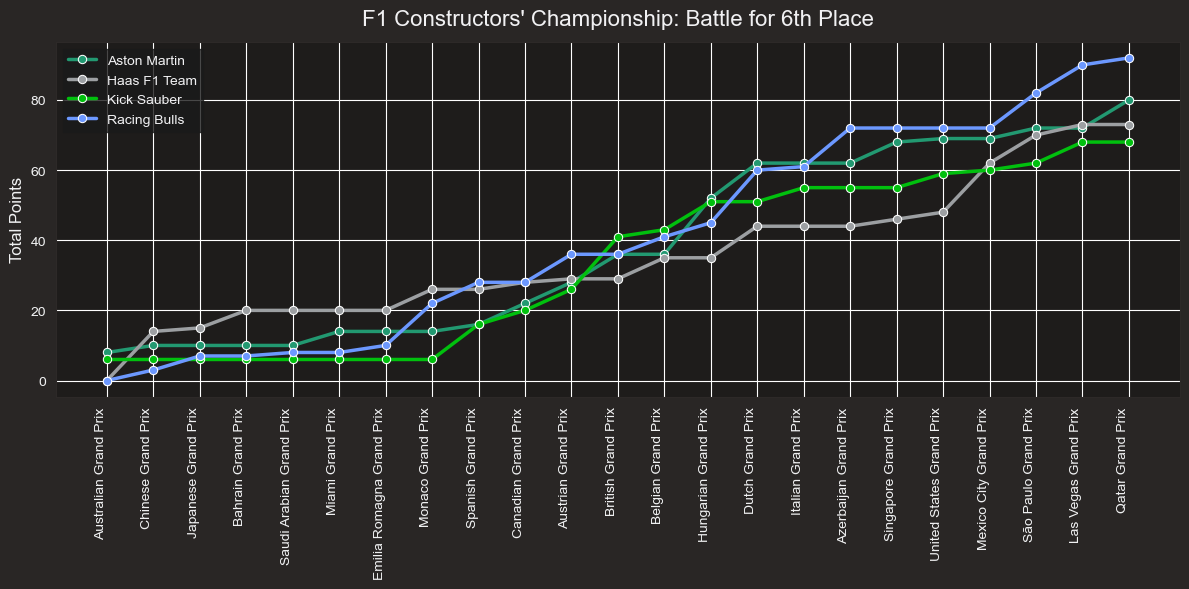

In [99]:
def graph_constructor_season(teams=[]):
    plt.figure(figsize=(12, 6))
    team_palette = {team: fastf1.plotting.get_team_color(team, session=race, colormap="official")
                    for team in race_points['Team Name'].unique()}
    if teams:
        constructor_points = race_points[race_points['Team Name'].isin(teams)]
    else:
        constructor_points = race_points
    sns.lineplot(
        data=constructor_points,
        x='RoundNumber',
        y='Cumulative Points',
        hue='Team Name',
        marker='o',
        linewidth=2.5,
        palette=team_palette
    )
    plt.title("F1 Constructors' Championship: Battle for 6th Place", fontsize=16)
    plt.xlabel('')
    plt.ylabel("Total Points", fontsize=12)
    plt.legend()

    # Optional: Set X-ticks to be the Race Names if they aren't too crowded
    unique_races = race_points[['RoundNumber', 'EventName']].drop_duplicates().sort_values('RoundNumber')
    plt.xticks(unique_races['RoundNumber'], unique_races['EventName'], rotation=90, ha='right')

    plt.tight_layout()
    plt.show()
graph_constructor_season(['Aston Martin', 'Haas F1 Team', 'Kick Sauber', 'Racing Bulls'])

# Season heatmap from fastf1 site

In [53]:
heatmap_data = df.pivot(
    index="Driver", columns="RoundNumber", values="Points"
).fillna(0)

# Save the final drivers standing and sort the data such that the lowest-
# scoring driver is towards the bottom
heatmap_data["total_points"] = heatmap_data.sum(axis=1)
heatmap_data = heatmap_data.sort_values(by="total_points", ascending=True)
total_points = heatmap_data["total_points"].values
heatmap_data = heatmap_data.drop(columns=["total_points"])

# Do the same for position.
position_data = df.pivot(
    index="Driver", columns="RoundNumber", values="Position"
).fillna("N/A")

In [57]:
hover_info = [
    [
        {
            "position": position_data.at[driver, race],
        }
        for race in schedule["RoundNumber"][:-1]
    ]
    for driver in heatmap_data.index
]

In [61]:
fig = make_subplots(
    rows=1,
    cols=2,
    column_widths=[0.85, 0.15],
    subplot_titles=("F1 2025 Season Summary", "Total Points"),
)
fig.update_layout(width=900, height=800)

# Per round summary heatmap
fig.add_trace(
    go.Heatmap(
        # Use the race names as x labels and the driver abbreviations
        # as the y labels
        x=short_event_names,
        y=heatmap_data.index,
        z=heatmap_data.values,
        # Use the points scored as overlay text
        text=heatmap_data.values,
        texttemplate="%{text}",
        textfont={"size": 12},
        customdata=hover_info,
        hovertemplate=(
            "Driver: %{y}<br>"
            "Race Name: %{x}<br>"
            "Points: %{z}<br>"
            "Position: %{customdata.position}<extra></extra>"
        ),
        colorscale="YlGnBu",
        showscale=False,
        zmin=0,
        # We need to set zmax for the two heatmaps separately as the
        # max value in the total points plot is significantly higher.
        zmax=heatmap_data.values.max(),
    ),
    row=1,
    col=1,
)

# Heatmap for total points
fig.add_trace(
    go.Heatmap(
        x=["Total Points"] * len(total_points),
        y=heatmap_data.index,
        z=total_points,
        text=total_points,
        texttemplate="%{text}",
        textfont={"size": 12},
        colorscale="YlGnBu",
        showscale=False,
        zmin=0,
        zmax=total_points.max(),
    ),
    row=1,
    col=2,
)

# Plot the updated heatmap
show(fig)